# Exporting a Sympy function to Numpy

Many problems we encounter in physics you can end up with an analytical function, let's say 

$f(x)= \frac{\sum_{n=1}^{1024} a_n x^n}{\sum_{n=1}^{1024} b_n x^n}$

over some assisted mathematical operations are going to be performed, such as automatic  derivatives or integral. Now, suppose that after obtaining $f(x)$ you need to evaluate this expression a million times! To evaluate that expression on Sympy is very time and a better strategy would be to convert $f(x)$ to some numerical library, and then calculate it. 

Here I will show how to create a function on Sympy and then convert it to Numpy, which is an standard for numerical calculations on Python, by using the sympy `lambdify` function. After that we consider the expression for an ideal paramagnet to show you that huge performance increase can be obtained with the use of `lambdify`. Although our example is simple, it illustrates our goal, paving the way to more complex applications. 

In [18]:
from sympy import lambdify, sympify, Symbol, tanh
import numpy as np
import matplotlib.pyplot as plt

As an example, let us consider the magnetization $m(T,H)$ of an ideal paramagnet at temperature $T$ and magnetic field $H$:

$m(H,T) = \mu_0 \tanh \left ( \frac{ \mu_0 H }{k_B T }  \right)$, 

where $\mu_0 = xxx$ and $k_B= xxx$ are constants. Let us consider $x = \mu_0 H /k_B T$ and, for simplicity, we will choose $\mu_B = 1.0$. With these assumptions we have just:

$m(x) = \tanh (x) $,

which is quite simple, but will be usefull for our purpose.

---

We start defining a Sympy function, this can be done on at least two ways that I have shown below.

In [19]:
# Alternative 1
x = Symbol('x')
m = tanh(x)

In [20]:
# Alternative 2
m = sympify('tanh(x)')

Next we convert this expression to numpy expression using the sympy function lambdify:

In [21]:
# Converting both the function and its derivative to numpy using lambdify()
np_m = lambdify('x', m)

Let's check the time it takes to calculate 

In [22]:
xv = 0.01

#sympy
%timeit mv = m.subs({'x': xv})

#numpy 
%timeit mv = np_m(xv)

72.6 µs ± 4.84 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
903 ns ± 35.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Thus, evaluating an expression in Numpy is about 75 times faster than Sympy! 
Let's see how that goes for multiple expressions!

In [27]:
x = np.arange(-10.0,10.0,0.02)

**Numpy, a thousand points!**

Comment the `%%timeit` magic to plot it latter.

In [28]:
%%timeit
ny = np_m( x )

18.7 µs ± 803 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Sympy, a thousand point!**

P.S.: Note that Sympy does not use Numpy or any other library, it is based on pure Python. So, it uses lists, which, by itself, are very slow!

In [30]:
x = list(x)

In [31]:
%%timeit

y = [m.subs({'x': xv}) for xv in x ]

4.46 s ± 54.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Now I think we got the case where it makes the WHOLE difference. Here on my laptop, which is a Dell Inspiron 14 (i7 8º gen) we got about 20.0 micro-seconds on Numpy and 500 mili-seconds on Sympy. Putting these numbers togeter we get

$ 500 ms /20.0 \mu s  \approx 25.000 !!! $

ÔOOOOh... It seems we have a turtle against a rocket! I didn't believe it myself and  had to comment the `%%timeit` magic myself and plot both results to check whether Numpy and Sympy where calculating the same thing... Note that the offset is just to help us visualize the different results!.

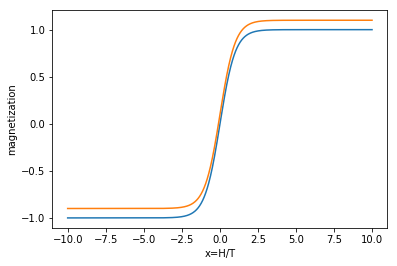

In [17]:
plt.xlabel('x=H/T')
plt.ylabel('magnetization')
plt.plot(x,y, x, ny+0.1)